<b>Спектрометрический гамма-метод</b>

Импортируем неообходимые бибилиотеки 

In [372]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from numpy import linalg as la

Считаем данные, содержащие элементарные спектры K, Th, U и сразу их обработаем: удалим ненужные столбцы (1-5 и последний с NaN значениями), а также будем идти только по четным строкам (только они информативны).

In [276]:
K = pd.read_csv(r'D:/Master`s Degree/2_semester/homework/k.csv.csv', sep=' ', header=None, skiprows=lambda x: x % 2 == 0)
K = K.drop(K.columns[[0, 1, 2, 3, 4, 5, -1]], axis=1)

U = pd.read_csv(r'D:/Master`s Degree/2_semester/homework/u.mdb.csv', sep=' ', header=None, skiprows=lambda x: x % 2 == 0)
U = U.drop(U.columns[[0, 1, 2, 3, 4, 5, -1]], axis=1)

Th = pd.read_csv(r'D:/Master`s Degree/2_semester/homework/th.mdb.csv', sep=' ', header=None, skiprows=lambda x: x % 2 == 0)
Th = Th.drop(Th.columns[[0, 1, 2, 3, 4, 5, -1]], axis=1)

In [278]:
K

,6,7,8,9,10,11,12,13,14,15,...,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029
0,2.025710,0.974290,2.945799,6.423595,8.011909,5.760045,5.549360,3.088258,9.355593,13.669115,...,0,0,0,0,0,0,0,0,0,0
1,0.675237,0.324763,2.945799,6.423595,5.618920,4.324763,6.699054,3.656316,10.386199,9.715860,...,0,0,0,0,0,0,0,0,0,0
2,2.700946,3.416583,2.355370,7.430607,5.287145,2.465888,4.637841,7.557040,9.363050,2.901169,...,0,0,0,0,0,0,0,0,0,0
3,1.350473,3.472899,8.541124,6.470785,3.557707,3.920089,4.518753,8.909071,11.247412,9.699722,...,0,0,0,0,0,0,0,0,0,0
4,4.051419,2.654424,1.767056,3.595326,5.717752,7.840178,9.103728,4.828047,9.510295,11.702282,...,0,0,0,0,0,0,0,0,0,0
5,2.025710,3.797663,2.649527,6.663550,5.054201,8.263773,8.416583,7.980412,7.522871,11.660657,...,0,0,0,0,0,0,0,0,0,0
6,0.675237,5.971508,3.826155,3.595326,3.324763,5.576628,4.862215,6.240623,5.527991,11.203228,...,0,0,0,0,0,0,0,0,0,0
7,1.350473,4.178742,3.680134,3.858876,1.729438,1.858876,7.214469,8.869894,12.167501,11.812799,...,0,0,0,0,0,0,0,0,0,0
8,1.350473,2.767056,3.091820,3.091820,4.828381,5.840067,3.607012,2.202337,7.515415,9.558598,...,0,0,0,0,0,0,0,0,0,0
9,2.025710,2.385977,4.752031,4.904508,5.717752,8.007791,9.011018,7.532109,8.943907,8.555147,...,0,0,0,0,0,0,0,0,0,0


Просуммируем полученные спектры

In [281]:
sum_K = K.sum()
sum_U = U.sum()
sum_Th = Th.sum()

Сгруппируем спектры в одну матрицу 

In [310]:
element_spectra = pd.concat((sum_K, sum_U, sum_Th), axis=1)
element_spectra.columns = ['K', 'U', 'Th']
element_spectra.index = range(1, len(element_spectra) + 1)
element_spectra

,K,U,Th
1,18.231386,71.899833,98.258097
2,29.943907,143.505843,190.827713
3,36.554814,202.458097,226.623929
4,52.457986,238.581859,258.190762
5,48.847969,262.351363,334.384975
...,...,...,...
1020,0.000000,0.000000,0.000000
1021,0.000000,0.000000,0.000000
1022,0.000000,0.000000,0.000000
1023,0.000000,0.000000,0.000000


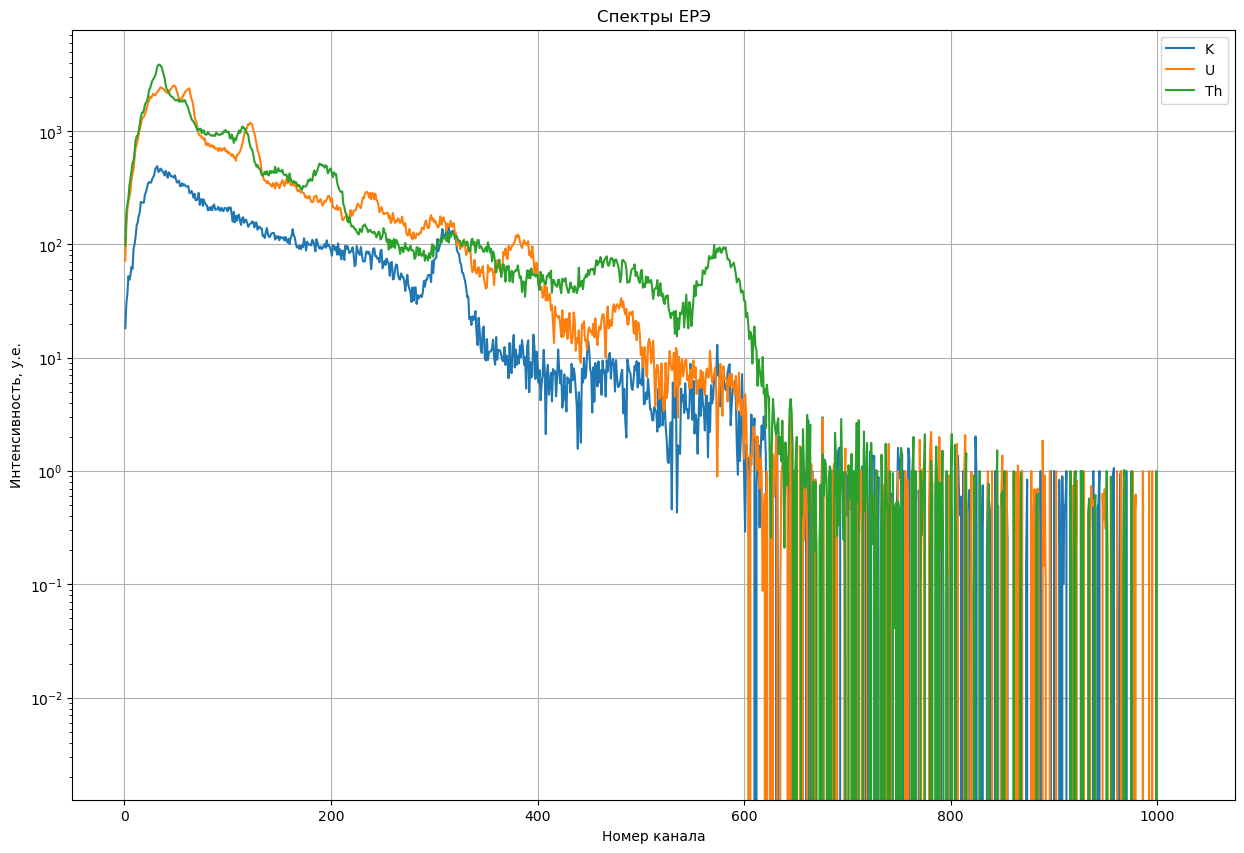

In [312]:
fig, ax = plt.subplots(figsize=(15, 10))
# Строим график на созданной фигуре
element_spectra.plot(logy=True, ax=ax)
ax.set_xlabel('Номер канала')
ax.set_ylabel('Интенсивность, у.е.')
ax.set_title('Спектры ЕРЭ')
ax.grid(True)
plt.show()

Загрузка данных измеренного спектра

In [353]:
Quest_T = pd.read_csv(r'D:/Master`s Degree/2_semester/homework/quest.mdb.csv', sep=' ', header=None, skiprows=lambda x: x % 2 == 0)
Quest_T = Quest_T.drop(Quest_T.columns[[0, 1, 2, 3, 4, 5, -1]], axis=1)
Quest = Quest_T.T

In [355]:
Quest

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
6,0.675237,5.401892,0.675237,5.401892,0.675237,4.726656,2.700946,9.778075,3.376183,7.427602,...,7.427602,4.051419,4.051419,4.051419,2.025710,0.675237,1.350473,2.025710,0.675237,0.000000
7,4.559822,8.950696,2.442293,12.732666,3.148136,12.155147,4.828269,11.280356,3.741347,8.513300,...,13.454201,6.889482,7.595326,6.183639,3.091820,1.736450,4.884585,3.091820,2.442293,0.705843
8,4.710740,13.694157,3.828269,15.912187,2.649527,22.529438,1.470785,11.778965,6.774068,13.842293,...,18.847190,11.632944,4.562604,5.447190,4.564719,3.534112,1.764942,4.564719,6.774068,4.712855
9,7.190651,17.760267,2.588314,22.362604,0.527101,24.231052,4.602337,19.270785,4.409572,19.557930,...,24.447412,11.806900,7.637284,4.385977,5.153033,4.889482,6.903506,6.687145,6.710740,7.717752
10,7.447190,21.882805,3.656539,23.139232,5.583639,24.642849,4.588314,32.810017,7.080134,17.421480,...,26.562827,17.916082,8.534669,7.313077,3.557707,4.355370,6.882471,5.618920,3.790651,2.661213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Поиск оптимального решения для концентраций методом наименьших квадратов

In [436]:
A_1 = np.linalg.pinv(element_spectra) @ Quest
A_1.index = ('K', 'U', 'Th')
print(A_1)

          0         1         2         3         4         5         6   \
K   0.059978  0.010422  0.070892 -0.003246  0.071938 -0.002440  0.068345   
U   0.002272  0.063164  0.001141  0.083644  0.001963  0.085228  0.002753   
Th  0.002789  0.003005  0.002575  0.001360  0.001444  0.001820  0.002663   

          7         8         9   ...        42        43        44        45  \
K   0.020554  0.061452  0.029576  ...  0.007943  0.042678  0.059007  0.062219   
U   0.080183  0.005272  0.053821  ...  0.008511  0.002703  0.004639  0.001534   
Th -0.001513  0.002634  0.002883  ...  0.068777  0.045211  0.021487  0.012088   

          46        47        48        49        50        51  
K   0.060445  0.071121  0.069729  0.067949  0.063214  0.079475  
U   0.004007 -0.000371 -0.000514  0.003097  0.002541  0.002381  
Th  0.002057  0.003699  0.003894  0.001504  0.002536  0.000337  

[3 rows x 52 columns]


Построим график для полученных концентраций

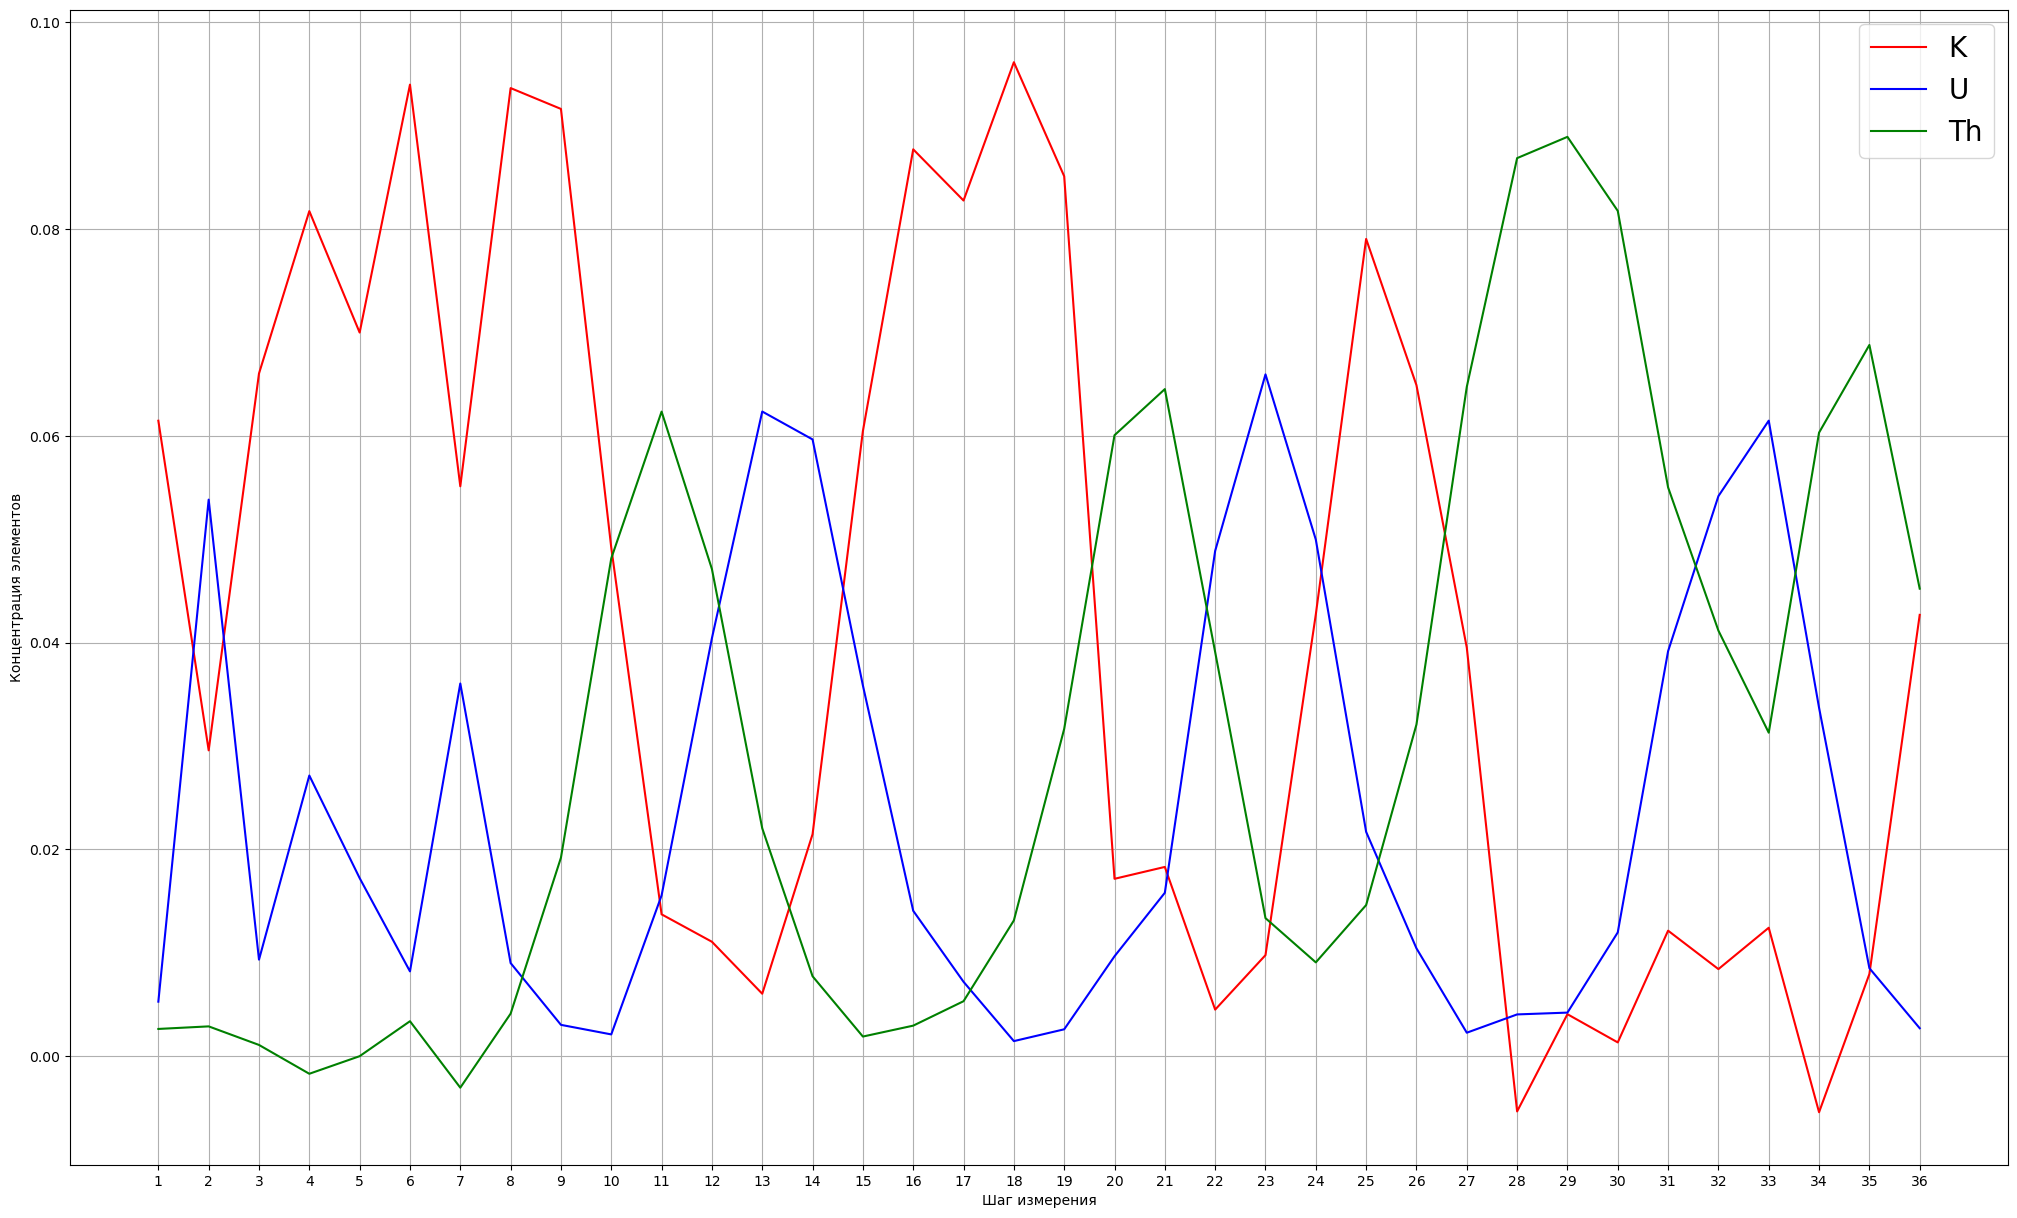

In [459]:
A = A_1.to_numpy()
#40 см: 5 = 8, поэтому от 52 отнимаем 8 и к началу прибавляем 8. То есть, берем срез от 8 до 44
conc_K = A[0, 8:44] #Калию соответствует 1я строка
conc_U = A[1, 8:44] #Урану соответствует 2я строка
conc_Th = A[2, 8:44] #Торию соответствует 3я строка
#52-8*2 = 36, поэтому берем от 1 до 37
number = np.arange(1, 37, 1) # Массив для 36 записей

plt.figure(figsize=(25,15))

plt.plot(number, conc_K, label = 'K', c = 'r')
plt.plot(number, conc_U, label = 'U', c = 'b')
plt.plot(number, conc_Th, label = 'Th', c = 'g')
plt.xticks(range(1,37,1))

plt.xlabel('Шаг измерения')
plt.ylabel('Концентрация элементов')

plt.legend(fontsize = 20)

plt.grid()


Определим последовательность укладки образцов

In [462]:

# Определение последовательности укладки образцов
# Параметры
length_sample_cm = 12  # Длина образца в см
interval_cm = 5  # Интервал измерений в см
num_samples = 15  # Количество образцов

# Пересчет данных на 15 образцов
sample_indices = np.linspace(0, len(conc_K) - 1, num_samples, dtype=int)  # Индексы для 15 образцов

# Список для хранения последовательности укладки
sequence = []

# Определение последовательности для каждого образца
for i in sample_indices:
    # Находим элемент с максимальной концентрацией в текущем образце
    max_element = np.argmax([conc_K[i], conc_U[i], conc_Th[i]])
    if max_element == 0:
        sequence.append('K')
    elif max_element == 1:
        sequence.append('U')
    elif max_element == 2:
        sequence.append('Th')

# Вывод результата
print("Последовательность укладки образцов:", sequence)

Последовательность укладки образцов: ['K', 'K', 'K', 'K', 'Th', 'U', 'K', 'K', 'Th', 'U', 'K', 'Th', 'Th', 'U', 'Th']
